In [2]:
# import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import linear_model
from sklearn.model_selection import train_test_split
plt.style.use('ggplot')

In [3]:
# Read Boston House Prices dataset

df = datasets.load_boston()
y = df.target
X = df.data

In [4]:
# Predicting house value from a single feature: RM

X_rooms = X[:,5]                             # Load feature RM
y = y.reshape(-1, 1)                         # Reshape to 2d array
X_rooms = X_rooms.reshape(-1, 1)             # Reshape to 2d array

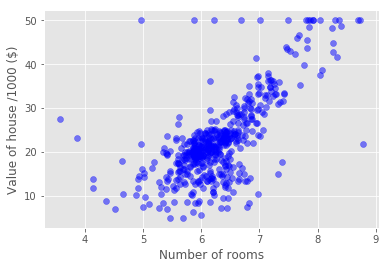

In [5]:
# Plotting hosue value vs. number of rooms

plt.scatter(X_rooms, y, c = 'blue', alpha = 0.5)
plt.ylabel('Value of house /1000 ($)')
plt.xlabel('Number of rooms')
plt.show()

In [6]:
# Fitting a regression model
reg = linear_model.LinearRegression()
reg.fit(X_rooms, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

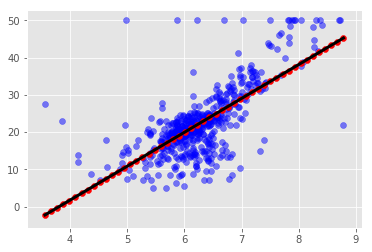

In [7]:
# Predict

# Draw the linear line
prediction_space = np.linspace(min(X_rooms), max(X_rooms)).reshape(-1, 1)
plt.scatter(X_rooms, y, color = 'blue', alpha = 0.5)
plt.plot(prediction_space, reg.predict(prediction_space), color = 'black', linewidth = 3)
plt.scatter(prediction_space, reg.predict(prediction_space), c = 'red')
plt.show()

# It's fitted as a line (f(x) = x)


In [8]:
# Do it again, with proper train and test dataset, and assess the performance
# Read the data again and reshape target y
# This is an example without regularization, so not cool
df = datasets.load_boston()
y = df.target.reshape(-1,1)
X = df.data


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
reg_all = linear_model.LinearRegression()
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test)

reg_all.score(X_test, y_test)

0.7109203586326303

In [9]:
#-----------------------------------------splitting from above---------------------------------------#
#----------------------------------------------------------------------------------------------------#
#----------------------------------------------------------------------------------------------------#

# Read Gapminder data for immortality
df = pd.read_csv('gapminder.csv')

In [10]:
# Create arrays for features (only fertility in this case) and target variable
y = df['life'].values
X = df['fertility'].values

# Reshape
y = y.reshape(-1,1)
X = X.reshape(-1,1)

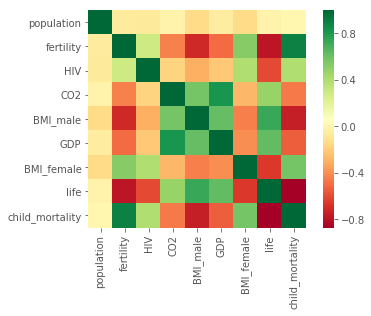

In [11]:
# Create Seaborn heatmap for EAD
import seaborn as sns
sns.heatmap(df.corr(), square = True, cmap = 'RdYlGn')
plt.show()

0.6192442167740035


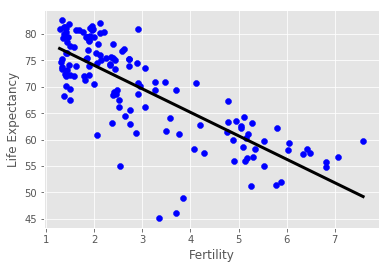

In [12]:
# Fit and preidct for regression
X_fertility = X

reg = linear_model.LinearRegression()      # Create the regressor
prediction_space = np.linspace(min(X_fertility), max(X_fertility)).reshape(-1, 1)         # Create the test set

reg.fit(X_fertility, y)      # fit the model
y_pred = reg.predict(prediction_space)     # predict with prediction test set


# Print Residual squared score (R^2 score), here they use training set to compute...
print (reg.score(X_fertility, y))


# Plot regression line
plt.scatter(X_fertility, y, c = 'blue')
plt.plot(prediction_space, y_pred, color = 'black', linewidth = 3)
plt.xlabel('Fertility')
plt.ylabel('Life Expectancy')
plt.show()

In [13]:
# Train/Test split for regression
# import mean sqaure error
from sklearn.metrics import mean_squared_error

# Reload the data, this time use all features
X = df.drop('life', axis = 1).values
y = df['life'].values.reshape(-1,1)

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# Create the regressor
reg_all = linear_model.LinearRegression()

# fit
reg_all.fit(X_train, y_train)

# Predict
y_pred = reg_all.predict(X_test)


# Compute and print R^2 and RMSE
print('R^2: {}'.format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.8380608054006469
Root Mean Squared Error: 3.247461387185825


In [14]:
# Cross validation k-fold cross validation
# import modules
from sklearn.model_selection import cross_val_score

# Create regressor
reg = linear_model.LinearRegression()

# Compute 5-fold cross-validation scores (这个过程包含了 fit和predict)
cv_scores = cross_val_score(reg, X, y, cv = 5)
print(cv_scores)

# print average 5-fold scores
print("Average 5-Fold CV Score: {}".format(np.mean (cv_scores)))


[0.8172464  0.82917953 0.90214407 0.80634466 0.94494538]
Average 5-Fold CV Score: 0.8599720080436704


In [36]:
# Regularized Regression     正则化
# Lasso Regularization: L1 regularization (feature selection)
# Ridge Regularization: L2 regularization (overfitting and underfitting)

# Create df_columns without the target "life"
df_columns = df.drop('life', axis = 1).columns

[-0.         -0.         -0.          0.          0.          0.
 -0.         -0.07087587]


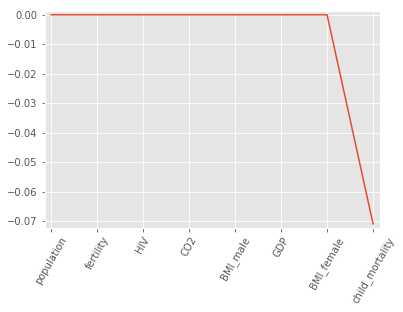

In [38]:
# Regularization I: Lasso (feature selection)
# Lasso is in sklearn.linear_model
# Instantiate a lasso regressor, with alpha = 0.4 and normalize = True

lasso = linear_model.Lasso(alpha = 0.4, normalize = True)

# Fit
lasso.fit(X, y)

# Compute and print the coefficients
lasso_coef = lasso.coef_

print(lasso_coef)

# Plot the coefficients
plt.plot(range(len(df_columns)), lasso_coef)
plt.xticks(range(len(df_columns)), df_columns.values, rotation=60)
plt.margins(0.02)
plt.show()


# Looks like the 'child_mortality' is the most important feature when predicting life expectancy

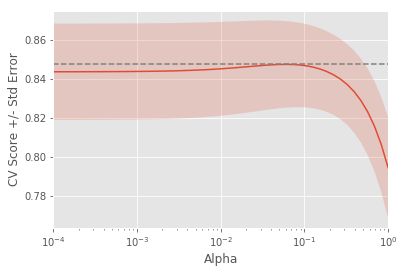

In [43]:
# Regularization II: Ridge (overfitting and underfitting)
# like Lasso, Ridge is also in sklearn.model_selection

# Setup the array of alphas and lists to store scores for plot purpose
alpha_space = np.logspace(-4, 0, 50)
ridge_scores_mean = []
ridge_scores_std = []

# Create a ridge regressor

ridge = linear_model.Ridge(normalize = True)

# Compute scores over range of alphas
for alpha in alpha_space:
    # Specity the alpha ralue to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores (这个过程包含了 fit, predict 和 split train/test set)
    ridge_cv_scores = cross_val_score(ridge, X, y, cv = 10)
    
    # Append the mean of ridge_cv_scores to ridge_scores_mean
    ridge_scores_mean.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))
    
# Display the plot
def display_plot(cv_scores_mean, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores_mean)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores_mean + std_error, cv_scores_mean - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores_mean), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

display_plot(ridge_scores_mean, ridge_scores_std) 

#  Notice how the cross-validation scores change with different alphas.